<a href="https://colab.research.google.com/github/sskboonmee/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [8]:
pizza_data = pd.read_csv('/content/Pizza.csv' )   #\t+ คือการใช้ tab แบ่งข้อมูล \s+ คือใช้ space แบ่งข้อมูล
pizza_data

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


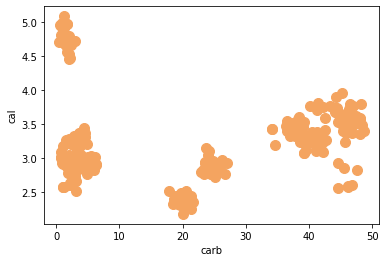

In [62]:
pizza_data.plot.scatter('carb','cal',s=100,c='#F4A460')

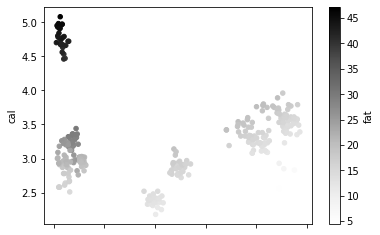

In [36]:
pizza_data.plot.scatter('carb','cal',c='fat')

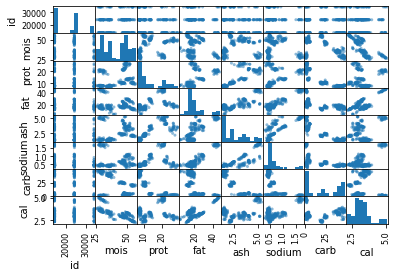

In [45]:
pd.plotting.scatter_matrix(pizza_data); 

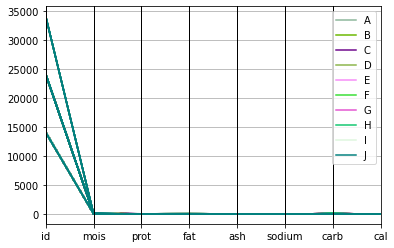

In [44]:
pd.plotting.parallel_coordinates(pizza_data, 'brand')

In [56]:
data_matrix = np.array(pizza_data.iloc[:,:-1])   #iloc เปลี่ยนการมองตารางปกติเป็นเมตริกซ์
data_matrix  

array([['A', 14069, 27.82, ..., 5.11, 1.77, 0.77],
       ['A', 14053, 28.49, ..., 5.34, 1.79, 1.02],
       ['A', 14025, 28.35, ..., 5.08, 1.63, 0.8],
       ...,
       ['J', 34039, 44.55, ..., 2.43, 0.64, 25.98],
       ['J', 14044, 47.6, ..., 2.32, 0.56, 24.47],
       ['J', 14045, 46.84, ..., 2.27, 0.57, 25.48]], dtype=object)

In [57]:
meanD = np.mean(data_matrix,axis=1)
meanD

TypeError: ignored